## Nhập môn máy học
 * Bài thực hành số 1
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng.

Hãy dùng mô hình học được: dự đoán xem căn nhà có thông số sau khả năng cao là giá bao nhiêu:
- width = 5, length = 10
- width = 20, length = 20
- width = 10, length = 40

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nộp file notebook có đuôi .ipynb và nộp về: huynhthanh98vn@gmail.com
- Deadline: 23g59 thứ 6 ngày 15/04/2022. Nộp trễ bị chia đôi số điểm.

Tải file dữ liệu

In [55]:
# tai file data
!gdown --id 1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O
To: /content/House_Price_2.csv
100% 2.46k/2.46k [00:00<00:00, 3.63MB/s]


Các thư viện được sử dụng

In [56]:
# cac thu vien
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

Load dữ liệu

In [57]:
# load du lieu
dataset = pd.read_csv('House_Price_2.csv')
dataset.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


Vẽ hình

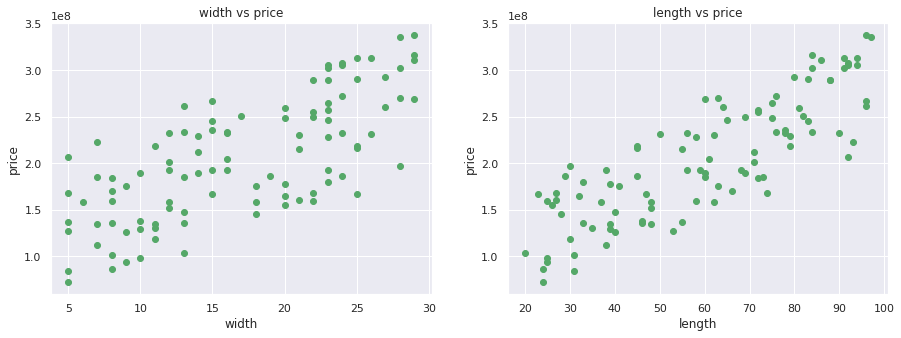

In [58]:
# ve hinh
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset['width'], dataset['price'], color = 'g')
plt.xlabel('width')
plt.ylabel('price')
plt.title('width vs price')

plt.subplot(1, 2, 2)
plt.scatter(dataset['length'], dataset['price'], color = 'g')
plt.xlabel('length')
plt.ylabel('price')
plt.title('length vs price')

plt.show()

Tính toán các giá trị

In [59]:
x = dataset.drop(['price'], axis = 1)
x

,width,length
0,28,97
1,21,62
2,27,64
3,5,92
4,13,84
...,...,...
95,23,94
96,10,69
97,11,35
98,8,66


In [60]:
y = dataset.price
y

0     3.350184e+08
1     2.298295e+08
2     2.603552e+08
3     2.064708e+08
4     2.339808e+08
          ...     
95    3.055955e+08
96    1.890808e+08
97    1.305380e+08
98    1.701948e+08
99    1.455254e+08
Name: price, Length: 100, dtype: float64

In [61]:
z = np.concatenate([x, np.ones((x.shape[0], 1))], axis = -1)
z

array([[28., 97.,  1.],
       [21., 62.,  1.],
       [27., 64.,  1.],
       [ 5., 92.,  1.],
       [13., 84.,  1.],
       [ 6., 62.,  1.],
       [14., 60.,  1.],
       [22., 72.,  1.],
       [29., 84.,  1.],
       [29., 60.,  1.],
       [18., 37.,  1.],
       [20., 32.,  1.],
       [15., 96.,  1.],
       [23., 58.,  1.],
       [29., 86.,  1.],
       [26., 50.,  1.],
       [25., 83.,  1.],
       [ 7., 73.,  1.],
       [24., 92.,  1.],
       [23., 65.,  1.],
       [14., 79.,  1.],
       [23., 33.,  1.],
       [15., 47.,  1.],
       [ 8., 46.,  1.],
       [23., 88.,  1.],
       [16., 61.,  1.],
       [25., 94.,  1.],
       [24., 56.,  1.],
       [12., 48.,  1.],
       [14., 71.,  1.],
       [13., 60.,  1.],
       [11., 30.,  1.],
       [10., 25.,  1.],
       [28., 84.,  1.],
       [28., 63.,  1.],
       [20., 26.,  1.],
       [ 5., 24.,  1.],
       [26., 91.,  1.],
       [20., 39.,  1.],
       [23., 38.,  1.],
       [18., 41.,  1.],
       [20., 81.

In [62]:
# tim a, b, c
[a, b, c] = np.matmul(np.matmul(np.linalg.inv(np.matmul(z.T, z)), z.T), y)
[a, b, c]

[4992438.83485118, 1997577.0972277792, 844994.8258748334]

In [63]:
def prediction(width, length):
  return a*width + b*length + c

In [64]:
# du doan width = 5, length = 10
print('du doan width = 5, length = 10')
prediction(5, 10)

du doan width = 5, length = 10


45782959.972408526

In [65]:
# du doan width = 20, length = 20
print('du doan width = 20, length = 20')
prediction(20, 20)

du doan width = 20, length = 20


140645313.46745402

In [66]:
# du doan width = 10, length = 40
print('du doan width = 10, length = 40')
prediction(10, 40)

du doan width = 10, length = 40


130672467.0634978

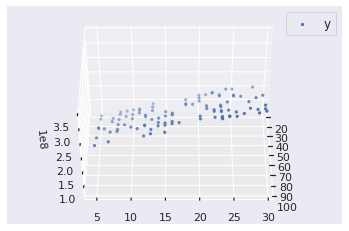

In [67]:
# ve hinh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, label = 'y', s = 5)
ax.view_init(45, 0)
ax.legend()
plt.show()

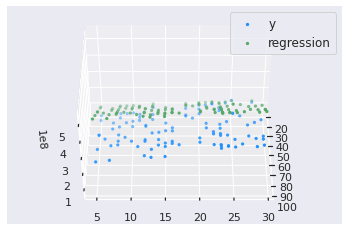

In [68]:
# ve hinh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, label = 'y', s = 5, color = 'dodgerblue')
ax.scatter(dataset.length, dataset.width, a*dataset.length + b*dataset.width + c, label = 'regression', s = 5, color = 'g') 
ax.view_init(45, 0)
ax.legend()
plt.show()